In [1]:
%matplotlib inline

import collections
import itertools
from time import time

import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

# Day 1

In [2]:
#measures = [199, 200, 208, 210, 200, 207, 240, 269, 260, 263]

In [3]:
measures = np.genfromtxt('day1.txt', dtype=int)

In [4]:
np.sum(np.diff(measures) > 0)

1342

In [5]:
sum_measures = np.lib.stride_tricks.sliding_window_view(measures, 3).sum(axis=1)

In [6]:
np.sum(np.diff(sum_measures) > 0)

1378

# Day 2

In [7]:
input = """\
forward 5
down 5
forward 8
up 3
down 8
forward 2
"""

In [8]:
input = open('day2.txt').read()

In [9]:
pos, depth = 0, 0
for action, step in (line.split() for line in input.splitlines()):
    if action == 'forward':
        pos += int(step)
    elif action == 'up':
        depth -= int(step)
    else:
        depth += int(step)

In [10]:
pos, depth, pos*depth

(1965, 1182, 2322630)

In [11]:
aim, depth, pos = 0, 0, 0

for action, step in (line.split() for line in input.splitlines()):
    if action == 'forward':
        pos += int(step)
        depth += aim * int(step)
    elif action == 'up':
        aim -= int(step)
    else:
        aim += int(step)

In [12]:
aim, depth, pos, pos*depth

(1182, 1071386, 1965, 2105273490)

# Day 3

In [2]:
input = """\
00100
11110
10110
10111
10101
01111
00111
11100
10000
11001
00010
01010
"""

In [3]:
input = open('day3.txt').read()

In [4]:
arr = np.array([list(x) for x in input.splitlines()]).astype(int)

In [5]:
gamma_rate = (arr.sum(axis=0) > arr.shape[0] // 2)
gamma_rate.astype(int)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [6]:
epsilon_rate = ~gamma_rate
epsilon_rate.astype(int)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [7]:
gamma_rate = int('0b' + ''.join(gamma_rate.astype(int).astype('U1')), 2)
gamma_rate

1916

In [8]:
epsilon_rate = int('0b' + ''.join(epsilon_rate.astype(int).astype('U1')), 2)
epsilon_rate

2179

In [9]:
gamma_rate * epsilon_rate

4174964

# Day 4

In [2]:
input = """\
7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1

22 13 17 11  0
 8  2 23  4 24
21  9 14 16  7
 6 10  3 18  5
 1 12 20 15 19

 3 15  0  2 22
 9 18 13 17  5
19  8  7 25 23
20 11 10 24  4
14 21 16 12  6

14 21 17 24  4
10 16 15  9 19
18  8 23 26 20
22 11 13  6  5
 2  0 12  3  7
"""

In [3]:
input = open('day4.txt').read()

In [4]:
lines = input.splitlines()

numbers = [int(x) for x in lines[0].split(',')]
lines = lines[1:]

boards = []
while len(lines) > 5:
    lines = lines[1:]
    board = lines[:5]
    lines = lines[5:]
    boards.append(np.genfromtxt(board, dtype=int))

boards = np.stack(boards)

In [7]:
%%time
found = np.zeros_like(boards, dtype=bool)
winners = []

for number in numbers:
    found |= boards == number
    full_row_col = np.concatenate([np.logical_and.reduce(found, axis=1),
                                   np.logical_and.reduce(found, axis=2)], axis=1)
    winner = np.logical_or.reduce(full_row_col, axis=1)
    if np.any(winner):
        for i in np.where(winner)[0]:
            if i in winners:
                continue
            score = np.sum(boards[i] * ~found[i]) * number
            #print(f'-> board {i} win: {score}')
            winners.append(i)

CPU times: user 17.1 ms, sys: 0 ns, total: 17.1 ms
Wall time: 16.6 ms


In [8]:
score

26936

# Day 5

In [2]:
input = """\
0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
"""

In [3]:
input = open('day5.txt').read()

In [4]:
coords = np.genfromtxt(input.replace(' -> ', ',').splitlines(), delimiter=',', dtype=int)
coords = coords.reshape(-1, 2, 2)

In [5]:
%%time
size = coords.max() + 1
grid = np.zeros((size, size), dtype=int)

for start, end in coords:
    if start[0] == end[0]:
        st = min(start[1], end[1])
        en = max(start[1], end[1]) + 1
        sl = np.s_[start[0], st:en]
    elif start[1] == end[1]:
        st = min(start[0], end[0])
        en = max(start[0], end[0]) + 1
        sl = np.s_[st:en, start[1]]
    else:
        continue
    grid[sl] += 1

CPU times: user 29.7 ms, sys: 16.5 ms, total: 46.3 ms
Wall time: 46.8 ms


In [6]:
#grid.T

In [7]:
np.sum(grid > 1)

6666

In [8]:
%%time
size = coords.max() + 1
grid = np.zeros((size, size), dtype=int)

for start, end in coords:
    minx = min(start[0], end[0])
    maxx = max(start[0], end[0])
    miny = min(start[1], end[1])
    maxy = max(start[1], end[1])
    
    if start[0] == end[0]:
        sl = np.s_[start[0], miny:maxy + 1]
        grid[sl] += 1
    elif start[1] == end[1]:
        sl = np.s_[minx:maxx + 1, start[1]]
        grid[sl] += 1
    elif np.unique(np.abs(end - start)).size == 1:
        indx = np.arange(minx, maxx+1)
        indy = np.arange(miny, maxy+1)

        if start[0] > end[0]:
            indx = indx[::-1]
        if start[1] > end[1]:
            indy = indy[::-1]
        grid[indx, indy] += 1

CPU times: user 26.1 ms, sys: 3.4 ms, total: 29.5 ms
Wall time: 27.6 ms


In [9]:
#grid.T

In [10]:
np.sum(grid > 1)

19081

In [ ]:
#plt.figure(figsize=(8, 8))
#plt.imshow(grid, cmap='Greys', vmax=2);

# Day 6

In [40]:
init_small = [3, 4, 3, 1, 2]

In [41]:
init_full = [
    5, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 3, 5,
    1, 1, 1, 5, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 5, 2, 1, 2, 2, 3, 1,
    1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 4, 1, 1, 1, 5, 4, 1, 1, 3, 3, 2, 1, 1, 1, 5,
    1, 1, 4, 1, 1, 5, 1, 1, 5, 1, 2, 3, 1, 5, 1, 3, 2, 1, 3, 1, 1, 4, 1, 1, 1,
    1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 4, 4, 1, 5, 1, 1, 3, 5, 1, 1, 5, 1, 4, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
    1, 5, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3,
    4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 2, 1, 2, 4,
    1, 1, 3, 1, 1, 1, 5, 1, 3, 1, 1, 1, 5, 5, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2, 1, 4, 1, 5, 1, 5, 1, 1, 1,
    1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 3, 1, 1, 4
]

In [42]:
def simulate(init, ndays=10, verbose=False):
    fishes = np.array(init, dtype=int)
    if verbose:
        print(f'Initial state  : {fishes}')

    for i in range(1, ndays+1):
        new = fishes == 0
        fishes[~new] -= 1
        fishes[new] = 6
        np.maximum(fishes, 0, out=fishes)
        fishes = np.append(fishes, np.full(np.count_nonzero(new), 8, dtype=np.uint8))
        if verbose:
            print(f'After {i:2d} day(s): {fishes}, {fishes.size} fishes')
    return fishes

In [43]:
simulate(init_small, 18, verbose=True);

Initial state  : [3 4 3 1 2]
After  1 day(s): [2 3 2 0 1], 5 fishes
After  2 day(s): [1 2 1 6 0 8], 6 fishes
After  3 day(s): [0 1 0 5 6 7 8], 7 fishes
After  4 day(s): [6 0 6 4 5 6 7 8 8], 9 fishes
After  5 day(s): [5 6 5 3 4 5 6 7 7 8], 10 fishes
After  6 day(s): [4 5 4 2 3 4 5 6 6 7], 10 fishes
After  7 day(s): [3 4 3 1 2 3 4 5 5 6], 10 fishes
After  8 day(s): [2 3 2 0 1 2 3 4 4 5], 10 fishes
After  9 day(s): [1 2 1 6 0 1 2 3 3 4 8], 11 fishes
After 10 day(s): [0 1 0 5 6 0 1 2 2 3 7 8], 12 fishes
After 11 day(s): [6 0 6 4 5 6 0 1 1 2 6 7 8 8 8], 15 fishes
After 12 day(s): [5 6 5 3 4 5 6 0 0 1 5 6 7 7 7 8 8], 17 fishes
After 13 day(s): [4 5 4 2 3 4 5 6 6 0 4 5 6 6 6 7 7 8 8], 19 fishes
After 14 day(s): [3 4 3 1 2 3 4 5 5 6 3 4 5 5 5 6 6 7 7 8], 20 fishes
After 15 day(s): [2 3 2 0 1 2 3 4 4 5 2 3 4 4 4 5 5 6 6 7], 20 fishes
After 16 day(s): [1 2 1 6 0 1 2 3 3 4 1 2 3 3 3 4 4 5 5 6 8], 21 fishes
After 17 day(s): [0 1 0 5 6 0 1 2 2 3 0 1 2 2 2 3 3 4 4 5 7 8], 22 fishes
After 18 day(s): 

In [44]:
simulate(init_full, 80).size

391888

In [45]:
def simulate2(init, ndays=10, verbose=False):
    t0 = time()
    nfishes = np.bincount(init, minlength=9)
    if verbose:
        print(f'Initial state  : {nfishes}')

    for i in range(1, ndays + 1):
        new_fishes = nfishes[0]
        nfishes[:8] = nfishes[1:]
        nfishes[6] += new_fishes
        nfishes[8] = new_fishes
        if verbose:
            print(f'After {i:2d} day(s): {nfishes} {nfishes.sum()} fishes')
    return nfishes.sum()

In [46]:
simulate2(init_small, 18, verbose=True)

Initial state  : [0 1 1 2 1 0 0 0 0]
After  1 day(s): [1 1 2 1 0 0 0 0 0] 5 fishes
After  2 day(s): [1 2 1 0 0 0 1 0 1] 6 fishes
After  3 day(s): [2 1 0 0 0 1 1 1 1] 7 fishes
After  4 day(s): [1 0 0 0 1 1 3 1 2] 9 fishes
After  5 day(s): [0 0 0 1 1 3 2 2 1] 10 fishes
After  6 day(s): [0 0 1 1 3 2 2 1 0] 10 fishes
After  7 day(s): [0 1 1 3 2 2 1 0 0] 10 fishes
After  8 day(s): [1 1 3 2 2 1 0 0 0] 10 fishes
After  9 day(s): [1 3 2 2 1 0 1 0 1] 11 fishes
After 10 day(s): [3 2 2 1 0 1 1 1 1] 12 fishes
After 11 day(s): [2 2 1 0 1 1 4 1 3] 15 fishes
After 12 day(s): [2 1 0 1 1 4 3 3 2] 17 fishes
After 13 day(s): [1 0 1 1 4 3 5 2 2] 19 fishes
After 14 day(s): [0 1 1 4 3 5 3 2 1] 20 fishes
After 15 day(s): [1 1 4 3 5 3 2 1 0] 20 fishes
After 16 day(s): [1 4 3 5 3 2 2 0 1] 21 fishes
After 17 day(s): [4 3 5 3 2 2 1 1 1] 22 fishes
After 18 day(s): [3 5 3 2 2 1 5 1 4] 26 fishes


26

In [47]:
simulate2(init_full, 80)

391888

In [48]:
simulate2(init_full, 256)

1754597645339

# Day 7

In [11]:
pos = np.sort(np.array([16, 1, 2, 0, 4, 2, 7, 1, 2, 14]))

In [24]:
pos = np.sort(np.genfromtxt('day7.txt', dtype=int, delimiter=','))

In [25]:
dist = np.abs(pos[:, None] - pos)
dist.sum(axis=0).min()

355764

In [26]:
np.median(pos), np.abs(pos - int(np.median(pos))).sum()

(339.0, 355764)

In [27]:
%%time
dist = np.abs(pos[:, None] - np.arange(pos.max() + 1))
cost = np.cumsum(np.arange(dist.max()+1))
np.sum(cost[dist], axis=0).min()

CPU times: user 20.7 ms, sys: 3.51 ms, total: 24.2 ms
Wall time: 21.6 ms


99634572

# Day 8

In [39]:
input_small = """\
be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe
edbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc
fgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg
fbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb
aecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea
fgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb
dbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe
bdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef
egadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb
gcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce
"""

In [40]:
input = open('day8.txt').read()

In [24]:
tokens = [line.split(' | ')[1].split() for line in input.splitlines()]

In [25]:
counts = collections.Counter(len(x) for x in itertools.chain(*tokens))

In [30]:
sum(counts[x] for x in [2, 3, 4, 7])

26

In [3]:
# 2 seg: 1
# 3    : 7
# 4    : 4
# 5    : 2, 3, 5
# 6    : 0, 6, 9
# 7    : 8

In [4]:
num2nseg = {1: 2, 4: 4, 7: 3, 8: 7}
nseg2num = {v:k for k, v in num2nseg.items()}

In [35]:
def parse(line):
    signal, digits = line.split(' | ')
    signal = [set(x) for x in signal.split(' ')]

    values = {}
    for token in signal:
        try:
            values[nseg2num[len(token)]] = set(token)
        except:
            pass

    for token in signal:
        if len(diff := values[8] - token) == 1:
            if diff & values[1]:
                values[6] = token
            elif diff & (values[4] - values[1]):
                values[0] = token
            else:
                values[9] = token

    seg_bottom_left = (values[8] - values[9]).pop()

    for token in signal:
        if len(token) == 5:
            if values[1].issubset(token):
                values[3] = token
            elif seg_bottom_left in token:
                values[2] = token
            else:
                values[5] = token

    trans = {frozenset(v): k for k, v in values.items()}
    res = [trans[frozenset(k)] for k in digits.split()]
    return sum(d * 10**i for i, d in enumerate(reversed(res)))

In [41]:
input_test = 'acedgfb cdfbe gcdfa fbcad dab cefabd cdfgeb eafb cagedb ab | cdfeb fcadb cdfeb cdbaf'

In [42]:
parse(input_test)

5353

In [47]:
sum(parse(line) for line in input_small.splitlines())

61229

In [48]:
input = open('day8.txt').read()

In [49]:
sum(parse(line) for line in input.splitlines())

1096964

# Day 9

In [2]:
input = """\
2199943210
3987894921
9856789892
8767896789
9899965678
"""

In [3]:
input = open('day9.txt').read()

In [4]:
hmap = np.genfromtxt(input.splitlines(), delimiter=1, dtype=int)

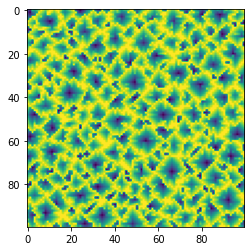

In [5]:
plt.imshow(hmap);

In [6]:
minmap = ndi.minimum_filter(hmap, size=3) == hmap

In [7]:
#plt.imshow(hmap)
#plt.imshow(np.ma.masked_equal(minmap, 0), cmap='Reds', vmin=0, vmax=1);

In [8]:
np.sum(hmap[minmap] + 1)

504

In [9]:
labels, nlabels = ndi.label(hmap < 9)

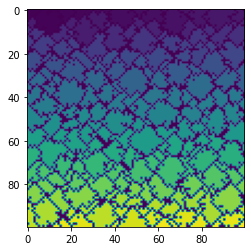

In [10]:
plt.imshow(labels);

In [11]:
areas = ndi.labeled_comprehension(np.ones_like(hmap, dtype=int), labels,
                                  np.arange(1, nlabels + 1), np.sum, int, 0)

In [12]:
np.prod(np.sort(areas)[-3:])

1558722